<a href="https://colab.research.google.com/github/kllcs/projects/blob/main/com_2028_AI_coursework.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Kasidy Landry 6800079 com2028 Artificial Intelligence coursework

In [ ]:
!unzip COM2028_2023.zip

In [ ]:
#create 8 folders for the data
import os

trainDir = "/content/train/"
traintxt = "/content/train.txt"

for x in range(8):
  imgDir = str(x)
  print(imgDir)
  path = os.path.join(trainDir, imgDir)
  print('path',path)

  #create folders
  try:
    os.mkdir(path)
  except OSError as error:
    print(error)

with open(traintxt) as trainFile:
  test_array = trainFile.readlines()

0
path /content/train/0
1
path /content/train/1
2
path /content/train/2
3
path /content/train/3
4
path /content/train/4
5
path /content/train/5
6
path /content/train/6
7
path /content/train/7


In [ ]:
#move files to class folder
import shutil
for x in test_array:
  splitter = x.split(' ')

  classname = splitter[1].split('\n')
  splitname = splitter[0].split('/')
  new = '/content/train/' + str(classname[0])
  curr = '/content/train/' + splitname[1]
  print(new)
  print(curr)
  shutil.move(curr, new)


In [ ]:
from tensorflow.python.ops.control_flow_ops import case_v2
import numpy as np
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
from tensorflow import keras
from keras.utils import to_categorical

# Model / data parameters
num_classes = 8
input_shape = (28, 28, 3)

Categories = ["0", "1", "2", "3", "4", "5", "6","7"]

#data
train_ds = tf.keras.utils.image_dataset_from_directory(
  '/content/train',
  color_mode = "rgb",
  validation_split=0.2,
  subset="training",
  seed=42,
  image_size=(28, 28),
  batch_size = 4)
val_ds = tf.keras.utils.image_dataset_from_directory(
  '/content/train',
  color_mode = "rgb",
  validation_split=0.2,
  subset="validation",
  seed=42,
  image_size=(28, 28),
   batch_size = 4)
print('Train label names:', train_ds.class_names)
print(train_ds)

Found 10000 files belonging to 8 classes.
Using 8000 files for training.
Found 10000 files belonging to 8 classes.
Using 2000 files for validation.
Train label names: ['0', '1', '2', '3', '4', '5', '6', '7']
<_BatchDataset element_spec=(TensorSpec(shape=(None, 28, 28, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>


First model: basic convolutional neural network model

In [ ]:
from time import time
from keras import optimizers
from keras.layers import Rescaling
from keras.models import Sequential
from keras.layers import MaxPooling2D
from keras.engine.training import Model
from keras.layers import Dense, Conv2D, Flatten
from tensorflow.python.keras.callbacks import TensorBoard

num_classes = 8
 # first convolutional neural network model
model1 = tf.keras.Sequential([
  tf.keras.layers.Rescaling(1./255),
  tf.keras.layers.Conv2D(16, 3, activation='relu'),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(num_classes, activation='softmax')
])

#compile model
model1.compile(
  optimizer='adam',
  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
  metrics=['accuracy'])

In [ ]:
#TRAIN model 1

model_history = model1.fit(
  train_ds,
  validation_data=val_ds,
  epochs=30
)

model1.summary()

Epoch 1/30
2000/2000 [==============================] - 22s 5ms/step - loss: 0.7878 - accuracy: 0.7103 - val_loss: 0.5047 - val_accuracy: 0.8120
Epoch 2/30
2000/2000 [==============================] - 10s 5ms/step - loss: 0.4590 - accuracy: 0.8351 - val_loss: 0.5868 - val_accuracy: 0.7785
Epoch 3/30
2000/2000 [==============================] - 10s 5ms/step - loss: 0.3701 - accuracy: 0.8660 - val_loss: 0.3959 - val_accuracy: 0.8630
Epoch 4/30
2000/2000 [==============================] - 10s 5ms/step - loss: 0.3083 - accuracy: 0.8878 - val_loss: 0.4446 - val_accuracy: 0.8545
Epoch 5/30
2000/2000 [==============================] - 10s 5ms/step - loss: 0.2398 - accuracy: 0.9118 - val_loss: 0.5117 - val_accuracy: 0.8585
Epoch 6/30
2000/2000 [==============================] - 10s 5ms/step - loss: 0.2129 - accuracy: 0.9249 - val_loss: 0.4924 - val_accuracy: 0.8555
Epoch 7/30
2000/2000 [==============================] - 10s 5ms/step - loss: 0.1709 - accuracy: 0.9383 - val_loss: 0.5079 - val_ac

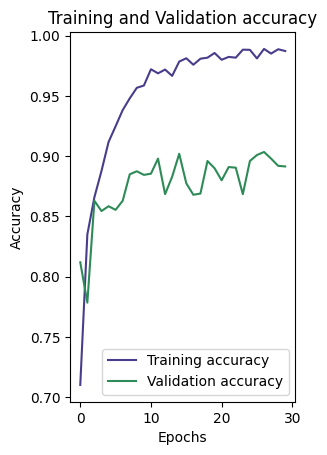

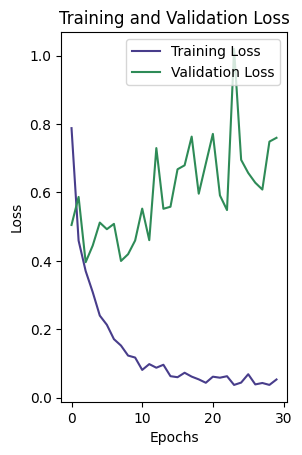

In [ ]:
T_acc = model_history.history['accuracy']
V_acc = model_history.history['val_accuracy']

T_loss = model_history.history['loss']
V_loss = model_history.history['val_loss']

epochs = range(0,30)

#plot accuracy
plt.subplot(1, 2, 1)
plt.plot(epochs, T_acc, 'darkslateblue', label='Training accuracy')
plt.plot(epochs, V_acc, 'seagreen', label='Validation accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()

#plot loss
plt.subplot(1, 2, 2)
plt.plot(epochs, T_loss, 'darkslateblue', label='Training Loss')
plt.plot(epochs, V_loss, 'seagreen', label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()


In [ ]:
testData = tf.keras.utils.image_dataset_from_directory(
  '/content/test',
  color_mode = "rgb",
  labels = None,
  image_size=(28, 28),
  batch_size = 4)

#model1 predictions
predictions1 = model1.predict(testData)

predictions1 = np.argmax(predictions1, axis=1)
print(predictions1)

Found 5000 files belonging to 1 classes.
1250/1250 [==============================] - 3s 2ms/step
[5 7 2 ... 2 3 4]


In [ ]:
import pandas as pd
from pandas import DataFrame as df

#put predictions from model 1 into txt file
testData = sorted(os.listdir('test'))
print(testData)
folder = "test/"
paths = [folder + x for x in testData]
print(paths)
df(data={"image_path":paths,"class":predictions1}).to_csv('test.txt',index_label='Id', sep=" ", index=False, header = None)


['00000.jpg', '00001.jpg', '00002.jpg', '00003.jpg', '00004.jpg', '00005.jpg', '00006.jpg', '00007.jpg', '00008.jpg', '00009.jpg', '00010.jpg', '00011.jpg', '00012.jpg', '00013.jpg', '00014.jpg', '00015.jpg', '00016.jpg', '00017.jpg', '00018.jpg', '00019.jpg', '00020.jpg', '00021.jpg', '00022.jpg', '00023.jpg', '00024.jpg', '00025.jpg', '00026.jpg', '00027.jpg', '00028.jpg', '00029.jpg', '00030.jpg', '00031.jpg', '00032.jpg', '00033.jpg', '00034.jpg', '00035.jpg', '00036.jpg', '00037.jpg', '00038.jpg', '00039.jpg', '00040.jpg', '00041.jpg', '00042.jpg', '00043.jpg', '00044.jpg', '00045.jpg', '00046.jpg', '00047.jpg', '00048.jpg', '00049.jpg', '00050.jpg', '00051.jpg', '00052.jpg', '00053.jpg', '00054.jpg', '00055.jpg', '00056.jpg', '00057.jpg', '00058.jpg', '00059.jpg', '00060.jpg', '00061.jpg', '00062.jpg', '00063.jpg', '00064.jpg', '00065.jpg', '00066.jpg', '00067.jpg', '00068.jpg', '00069.jpg', '00070.jpg', '00071.jpg', '00072.jpg', '00073.jpg', '00074.jpg', '00075.jpg', '00076.jpg'

Second model:
added more layers, dropout, and data augmentation

In [ ]:
from time import time
import tensorflow as tf
from keras import optimizers
from keras.layers import Rescaling
from keras.models import Sequential
from keras.layers import MaxPooling2D
from keras.engine.training import Model
from keras.layers import Dense, Conv2D, Flatten, Dropout
from tensorflow.python.keras.callbacks import TensorBoard

num_classes = 8

#second convolutional neural network model
model2 = tf.keras.Sequential([
  tf.keras.layers.Rescaling(1./255),
  tf.keras.layers.Conv2D(16, 3, activation='relu',padding='valid', input_shape=(28,28,3)),
  tf.keras.layers.Conv2D(32, 3, activation='relu',padding='same', input_shape=(28,28,3)),
  tf.keras.layers.Conv2D(32, 3, activation='relu',padding='same', input_shape=(28,28,3)),
  tf.keras.layers.MaxPooling2D(),

  #dropout
  tf.keras.layers.Dropout(0.2),

  #Data augmentation
  tf.keras.layers.RandomFlip("horizontal", input_shape=(28,28,3)),
  tf.keras.layers.RandomRotation(0.1),
  tf.keras.layers.RandomZoom(0.1),

  tf.keras.layers.Conv2D(64, 3, activation='relu',padding='same', input_shape=(28,28,3)),
  tf.keras.layers.Conv2D(64, 3, activation='relu',padding='same', input_shape=(28,28,3)),
  tf.keras.layers.Conv2D(128, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),

  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(512, activation='relu'),
  tf.keras.layers.Dense(num_classes, activation='softmax')
])

#compile model 2
model2.compile(
  optimizer='adam',
  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
  metrics=['accuracy'])

In [ ]:
#TRAIN model 2

model_history = model2.fit(
  train_ds,
  validation_data=val_ds,
  epochs=30,
  shuffle = True
)

model2.summary()

Epoch 1/30
2000/2000 [==============================] - 21s 8ms/step - loss: 1.5291 - accuracy: 0.3906 - val_loss: 0.8969 - val_accuracy: 0.6355
Epoch 2/30
2000/2000 [==============================] - 17s 9ms/step - loss: 0.8015 - accuracy: 0.7024 - val_loss: 0.6727 - val_accuracy: 0.7550
Epoch 3/30
2000/2000 [==============================] - 17s 8ms/step - loss: 0.6471 - accuracy: 0.7591 - val_loss: 0.5616 - val_accuracy: 0.7960
Epoch 4/30
2000/2000 [==============================] - 17s 9ms/step - loss: 0.5950 - accuracy: 0.7841 - val_loss: 0.5437 - val_accuracy: 0.7850
Epoch 5/30
2000/2000 [==============================] - 17s 8ms/step - loss: 0.5508 - accuracy: 0.8026 - val_loss: 0.4807 - val_accuracy: 0.8215
Epoch 6/30
2000/2000 [==============================] - 17s 9ms/step - loss: 0.4979 - accuracy: 0.8239 - val_loss: 0.4616 - val_accuracy: 0.8315
Epoch 7/30
2000/2000 [==============================] - 17s 8ms/step - loss: 0.4691 - accuracy: 0.8274 - val_loss: 0.4162 - val_ac

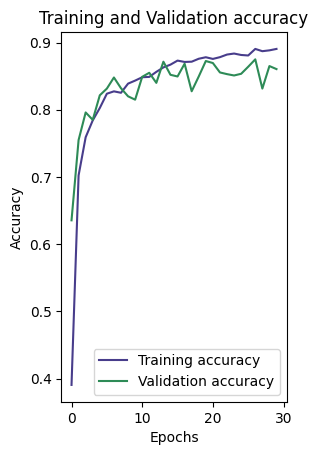

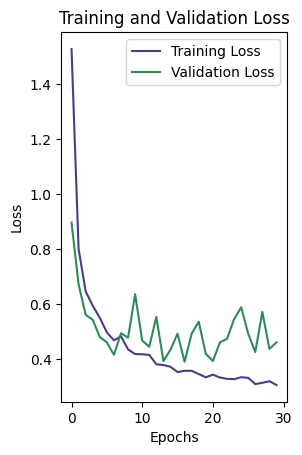

In [ ]:
T_acc = model_history.history['accuracy']
V_acc = model_history.history['val_accuracy']

T_loss = model_history.history['loss']
V_loss = model_history.history['val_loss']

epochs = range(0,30)

#plot accuracy
plt.subplot(1, 2, 1)
plt.plot(epochs, T_acc, 'darkslateblue', label='Training accuracy')
plt.plot(epochs, V_acc, 'seagreen', label='Validation accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()

#plot loss
plt.subplot(1, 2, 2)
plt.plot(epochs, T_loss, 'darkslateblue', label='Training Loss')
plt.plot(epochs, V_loss, 'seagreen', label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

In [ ]:
# test data
testData2 = tf.keras.utils.image_dataset_from_directory(
  '/content/test',
  color_mode = "rgb",
  labels = None,
  image_size=(28, 28),
  batch_size = 4,
  shuffle=False)

#model2 predictions
predictions2 = model2.predict(testData2)

predictions2 = np.argmax(predictions2, axis=1)
print(predictions2)


Found 5000 files belonging to 1 classes.
1250/1250 [==============================] - 3s 3ms/step
[1 3 6 ... 2 5 4]


In [ ]:
import pandas as pd
from pandas import DataFrame as df

#put predictions from model 2 into txt file
testData2 = sorted(os.listdir('test'))
print(testData2)
folder = "test/"
paths = [folder + x for x in testData2]
print(paths)
df(data={"image_path":paths,"class":predictions2}).to_csv('test.txt',index_label='Id',sep=" ",index=False, header = None)


['00000.jpg', '00001.jpg', '00002.jpg', '00003.jpg', '00004.jpg', '00005.jpg', '00006.jpg', '00007.jpg', '00008.jpg', '00009.jpg', '00010.jpg', '00011.jpg', '00012.jpg', '00013.jpg', '00014.jpg', '00015.jpg', '00016.jpg', '00017.jpg', '00018.jpg', '00019.jpg', '00020.jpg', '00021.jpg', '00022.jpg', '00023.jpg', '00024.jpg', '00025.jpg', '00026.jpg', '00027.jpg', '00028.jpg', '00029.jpg', '00030.jpg', '00031.jpg', '00032.jpg', '00033.jpg', '00034.jpg', '00035.jpg', '00036.jpg', '00037.jpg', '00038.jpg', '00039.jpg', '00040.jpg', '00041.jpg', '00042.jpg', '00043.jpg', '00044.jpg', '00045.jpg', '00046.jpg', '00047.jpg', '00048.jpg', '00049.jpg', '00050.jpg', '00051.jpg', '00052.jpg', '00053.jpg', '00054.jpg', '00055.jpg', '00056.jpg', '00057.jpg', '00058.jpg', '00059.jpg', '00060.jpg', '00061.jpg', '00062.jpg', '00063.jpg', '00064.jpg', '00065.jpg', '00066.jpg', '00067.jpg', '00068.jpg', '00069.jpg', '00070.jpg', '00071.jpg', '00072.jpg', '00073.jpg', '00074.jpg', '00075.jpg', '00076.jpg'